Homework 4: Sentiment Analysis - Task 3
----

Names
----
Names: __Adrian Criollo__ (Write these in every notebook you submit.)

Task 3: Train a Logistic Regression Model (20 points)
----

Using `sklearn`'s implementation of `LogisticRegression`, conduct a similar analysis on the performance of a Logistic Regression classifier on the provided data set.

Using the `time` module, you'll compare and contrast how long it takes your home-grown BoW vectorizing function vs. `sklearn`'s `CountVectorizer`.

Logistic regression is used for binary classification, but can be extended for multi-class classification

Read more about logistic regression here - https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/.

Recall from task 2 what binarized and multinomial mean here: a __binarized__ bag of words representation is one where we put 1 [true] if the word is there and 0 [false] otherwise, and a __multinomial__ bag of words representation is one where we put the count of the word if the word occurs, and 0 otherwise.

**10 points in Task 5 will be allocated for all 9 graphs (including the one generated here in Task 3 for Logistic Regression) being:**
- Legible
- Present below
- Properly labeled
     - x and y axes labeled
     - Legend for accuracy measures plotted
     - Plot Title with which model and run number the graph represents


In [5]:
from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter, defaultdict
import time
import sentiment_utils as sutils
from typing import List, Tuple
import numpy as np

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adriancriollo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

# some variables you may want to use
# BINARIZED = True
# USE_COUNT_VECTORIZER = False

In [7]:
# Write the functions needed (here or in sentiment_utils.py) to create vectorized BoW representations
# of your data. We recommend starting with a multinomial BoW representation.
# Each training example should be represented as a sparse vector.
def bow_vectorizer_implementation(docs: List[str], binary: bool = False) -> Tuple[List[List[int]], List[str]]:
    vocab = set()
    for doc in docs:
        for word in doc.split():
            vocab.add(word)
    vocab_list = sorted(vocab)
    tokenized_docs = [doc.split() for doc in docs]
    feature_matrix = sutils.featurize(vocab, tokenized_docs, binary=binary)
    return feature_matrix, vocab_list

def sklearn_bow_vectorizer(docs: List[str], binary: bool = False) -> Tuple[np.ndarray, List[str]]:
    vectorizer = CountVectorizer(binary=binary)
    X = vectorizer.fit_transform(docs)
    return X.toarray(), vectorizer.get_feature_names_out()

In [8]:
# how much time does it take to featurize the all data with your implementation?

train_docs, train_labels = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_docs, dev_labels = sutils.generate_tuples_from_file(DEV_FILE)

# Start timing
start = time.time()
X_train, vocab = bow_vectorizer_implementation([' '.join(doc) for doc in train_docs], binary=False)
X_dev, _ = bow_vectorizer_implementation([' '.join(doc) for doc in dev_docs], binary=False)

# End timing
end = time.time()
print("That took:", end - start, "seconds")



That took: 0.2115650177001953 seconds


In [9]:
# how much time does it take to featurize the all data with sklearn's CountVectorizer?

start = time.time()


# YOUR CODE HERE

train_docs, train_labels = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_docs, dev_labels = sutils.generate_tuples_from_file(DEV_FILE)

train_docs_joined = [' '.join(doc) for doc in train_docs]
dev_docs_joined = [' '.join(doc) for doc in dev_docs]

start = time.time()

vectorizer = CountVectorizer(binary=False)
X_train_sklearn = vectorizer.fit_transform(train_docs_joined)
X_dev_sklearn = vectorizer.transform(dev_docs_joined)

end = time.time()
print("That took:", end - start, "seconds")

X_train, vocab_list = bow_vectorizer_implementation(train_docs_joined, binary=False)
vocab_size = len(vocab_list)
print("Vocabulary size using custom vectorizer:", vocab_size)
sklearn_vocab_size = len(vectorizer.get_feature_names_out())
print("Vocabulary size using CountVectorizer:", sklearn_vocab_size)

That took: 0.11732816696166992 seconds
Vocabulary size using custom vectorizer: 30705
Vocabulary size using CountVectorizer: 22596


1. How big is your vocabulary using your vectorization function(s)? __30705__
2. How big is your vocabulary using the `CountVectorizer`? __22596__

In [11]:
#  write any code you need analyze the relative sparsity of your vectorized representations of the data

# YOUR CODE HERE
def calculate_sparsity(feature_matrix) -> float:
    feature_matrix = np.array(feature_matrix)
    total_entries_per_vector = feature_matrix.shape[1]
    zero_percentages = np.sum(feature_matrix == 0, axis=1) / total_entries_per_vector * 100
    return np.mean(zero_percentages)
    
# Print out the average % of entries that are zeros in each vector in the vectorized training data
# YOUR CODE HERE

print("Sparsity in BoW implementation representation:")
implementation_sparsity = calculate_sparsity(X_train)
print(f"Average % of zero entries: {implementation_sparsity}%")

print("\nSparsity in sklearn CountVectorizer representation:")
sklearn_sparsity = calculate_sparsity(X_train_sklearn.toarray())
print(f"Average % of zero entries: {sklearn_sparsity}%")

Sparsity in BoW implementation representation:
Average % of zero entries: 99.50924523693212%

Sparsity in sklearn CountVectorizer representation:
Average % of zero entries: 99.39459417596034%


Training data percentage: 10%
Precision: 0.7129, Recall: 0.6857, F1 Score: 0.6990, Accuracy: 0.6900

Training data percentage: 20%
Precision: 0.7757, Recall: 0.7905, F1 Score: 0.7830, Accuracy: 0.7700

Training data percentage: 30%
Precision: 0.7818, Recall: 0.8190, F1 Score: 0.8000, Accuracy: 0.7850

Training data percentage: 40%
Precision: 0.7925, Recall: 0.8000, F1 Score: 0.7962, Accuracy: 0.7850

Training data percentage: 50%
Precision: 0.8113, Recall: 0.8190, F1 Score: 0.8152, Accuracy: 0.8050

Training data percentage: 60%
Precision: 0.8113, Recall: 0.8190, F1 Score: 0.8152, Accuracy: 0.8050

Training data percentage: 70%
Precision: 0.8131, Recall: 0.8286, F1 Score: 0.8208, Accuracy: 0.8100

Training data percentage: 80%
Precision: 0.8095, Recall: 0.8095, F1 Score: 0.8095, Accuracy: 0.8000

Training data percentage: 90%
Precision: 0.7838, Recall: 0.8286, F1 Score: 0.8056, Accuracy: 0.7900

Training data percentage: 100%
Precision: 0.7748, Recall: 0.8190, F1 Score: 0.7963, Accurac

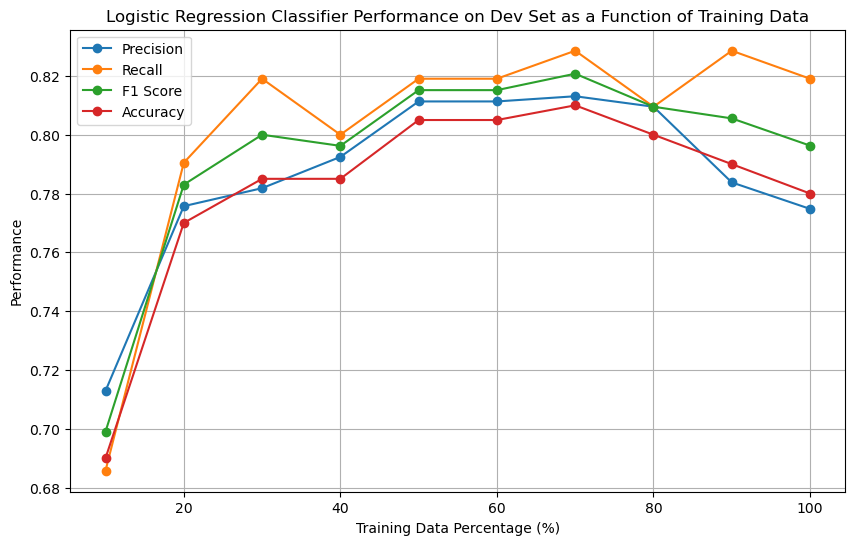

Custom Multinomial F1 Score: 0.780952380952381
Custom Binarized F1 Score: 0.8202764976958525
CV Multinomial F1 Score: 0.7962962962962963
CV Binarized F1 Score: 0.8202764976958525
Training data percentage: 10%
Precision: 0.7184, Recall: 0.7048, F1 Score: 0.7115, Accuracy: 0.7000

Training data percentage: 20%
Precision: 0.7778, Recall: 0.8000, F1 Score: 0.7887, Accuracy: 0.7750

Training data percentage: 30%
Precision: 0.7768, Recall: 0.8286, F1 Score: 0.8018, Accuracy: 0.7850

Training data percentage: 40%
Precision: 0.7692, Recall: 0.8571, F1 Score: 0.8108, Accuracy: 0.7900

Training data percentage: 50%
Precision: 0.7818, Recall: 0.8190, F1 Score: 0.8000, Accuracy: 0.7850

Training data percentage: 60%
Precision: 0.7778, Recall: 0.8000, F1 Score: 0.7887, Accuracy: 0.7750

Training data percentage: 70%
Precision: 0.7928, Recall: 0.8381, F1 Score: 0.8148, Accuracy: 0.8000

Training data percentage: 80%
Precision: 0.7632, Recall: 0.8286, F1 Score: 0.7945, Accuracy: 0.7750

Training data

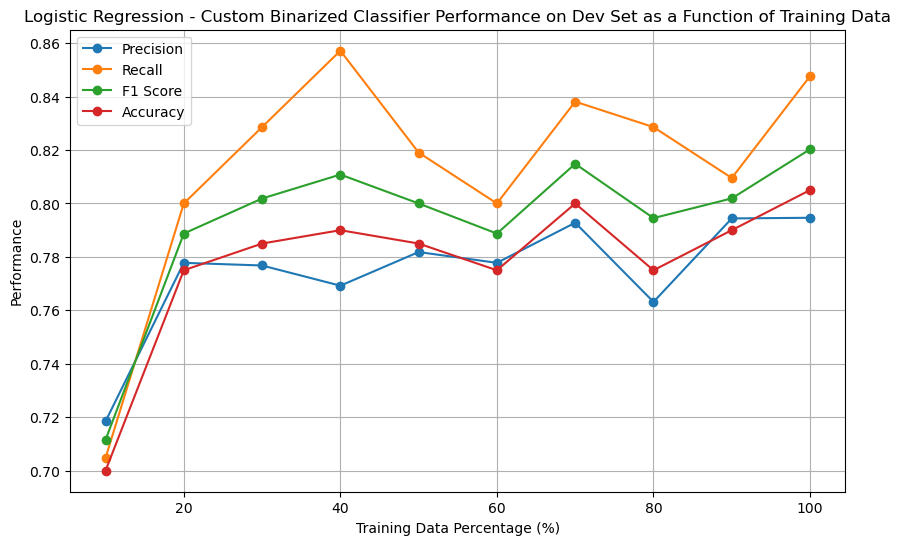

Training data percentage: 10%
Precision: 0.7248, Recall: 0.7524, F1 Score: 0.7383, Accuracy: 0.7200

Training data percentage: 20%
Precision: 0.7636, Recall: 0.8000, F1 Score: 0.7814, Accuracy: 0.7650

Training data percentage: 30%
Precision: 0.7479, Recall: 0.8476, F1 Score: 0.7946, Accuracy: 0.7700

Training data percentage: 40%
Precision: 0.7377, Recall: 0.8571, F1 Score: 0.7930, Accuracy: 0.7650

Training data percentage: 50%
Precision: 0.7545, Recall: 0.7905, F1 Score: 0.7721, Accuracy: 0.7550

Training data percentage: 60%
Precision: 0.7565, Recall: 0.8286, F1 Score: 0.7909, Accuracy: 0.7700

Training data percentage: 70%
Precision: 0.7477, Recall: 0.7905, F1 Score: 0.7685, Accuracy: 0.7500

Training data percentage: 80%
Precision: 0.7807, Recall: 0.8476, F1 Score: 0.8128, Accuracy: 0.7950

Training data percentage: 90%
Precision: 0.7895, Recall: 0.8571, F1 Score: 0.8219, Accuracy: 0.8050

Training data percentage: 100%
Precision: 0.7946, Recall: 0.8476, F1 Score: 0.8203, Accurac

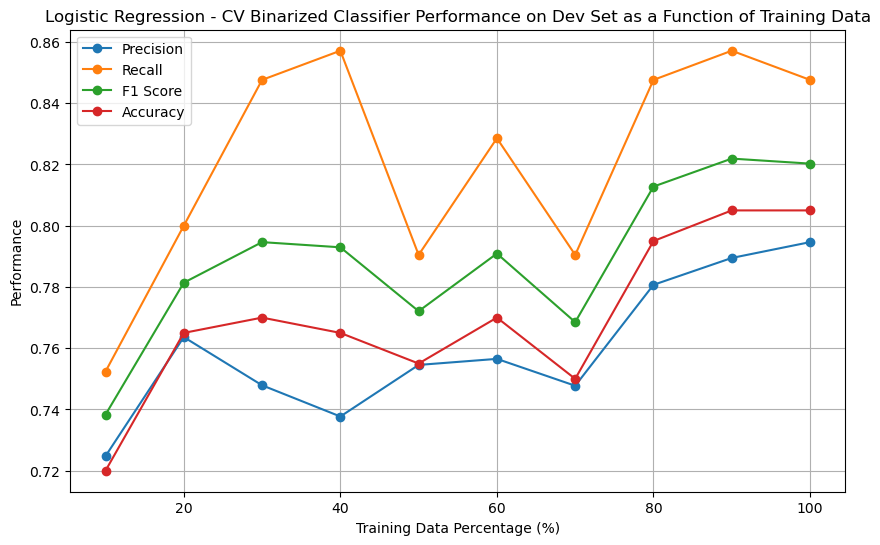

In [12]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well)


# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# NOTE : make sure one of your experiments uses 10% of the data, you will need this to answer the first question in task 5
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels


train_docs_joined = [' '.join(doc) for doc in train_docs]
dev_docs_joined = [' '.join(doc) for doc in dev_docs]

vectorizer = CountVectorizer(binary=False)
X_train_vectorized = vectorizer.fit_transform(train_docs_joined).toarray()
X_dev_vectorized = vectorizer.transform(dev_docs_joined).toarray()

train_feats = [(X_train_vectorized[i], train_labels[i]) for i in range(len(train_docs))]
dev_feats = [(X_dev_vectorized[i], dev_labels[i]) for i in range(len(dev_docs))]

sutils.create_training_graph(sutils.logistic_regression_helper, train_feats, dev_feats, kind="Logistic Regression", savepath="logistic_regression_graph3.png", verbose=True)


y_train = np.array(train_labels)
y_dev = np.array(dev_labels)

configs = {
    "Custom Multinomial": {"binary": False, "vectorizer": "custom"},
    "Custom Binarized": {"binary": True, "vectorizer": "custom"},
    "CV Multinomial": {"binary": False, "vectorizer": "count"},
    "CV Binarized": {"binary": True, "vectorizer": "count"}
}

vocab = sutils.create_index(train_docs)
results = {}

for config_name, config in configs.items():
    if config["vectorizer"] == "custom":
        X_train = sutils.featurize(vocab, train_docs, binary=config["binary"])
        X_dev = sutils.featurize(vocab, dev_docs, binary=config["binary"])
    else:
        vectorizer = CountVectorizer(binary=config["binary"])
        X_train = vectorizer.fit_transform([' '.join(doc) for doc in train_docs]).toarray()
        X_dev = vectorizer.transform([' '.join(doc) for doc in dev_docs]).toarray()

    train_feats = [(X_train[i], y_train[i]) for i in range(len(y_train))]
    dev_feats = [(X_dev[i], y_dev[i]) for i in range(len(y_dev))]
    precision, recall, f1, accuracy = sutils.logistic_regression_helper(train_feats, dev_feats)
    results[config_name] = {"precision": precision, "recall": recall, "f1": f1, "accuracy": accuracy, "train_feats": train_feats, "dev_feats": dev_feats}

for config_name, metrics in results.items():
    print(f"{config_name} F1 Score: {metrics['f1']}")

sutils.create_training_graph(sutils.logistic_regression_helper, results["Custom Binarized"]["train_feats"], results["Custom Binarized"]["dev_feats"], kind=f"Logistic Regression - Custom Binarized", savepath="logistic_regression_custom_bin.png", verbose=True)
sutils.create_training_graph(sutils.logistic_regression_helper, results["CV Binarized"]["train_feats"], results["CV Binarized"]["dev_feats"], kind=f"Logistic Regression - CV Binarized", savepath="logistic_regression_cv_bin.png", verbose=True)





Test the following 4 combinations to determine which has the best final f1 score for your Logistic Regression model:
- your vectorized features, multinomial: __.78__
- CountVectorizer features, multinomial: __.82__
- your vectorized features, binarized: __.79__
- CountVectorizer features, binarized: __.82__

Produce your graph(s) for the combination with the best final f1 score.


